<h3 style="color:#C0C0C0;text-align:center;font-size: smaller;">Applied Machine Learning and Data Mining - U26538</h3>

<br>
<h1 style="color:#800080;text-align:center;"> Practical Exercise (17)</h1>
<h2 style="color:#800080;text-align:center;">Hierarchical Clustering</h2>

<b>Question</b>
<li>Apply Hierarchical clustering to the <u>Bank dataset</u> (download from moodle), you also need to:.</li>
<li>Cluster the dataset based on two different objectives and attributes.</li>
<li>Analyze and visualize the results.</li>
<li>Evaluate the clustering results.</li>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
dt = pd.read_csv('bank.csv')
dt

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,NaN,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,NaN,3,jun,199,4,-1,0,NaN,no
4,59,blue-collar,married,secondary,no,0,yes,no,NaN,5,may,226,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,NaN,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,NaN,9,may,153,1,-1,0,NaN,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,NaN,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [18]:
dt['job']

0          unemployed
1            services
2          management
3          management
4         blue-collar
            ...      
4516         services
4517    self-employed
4518       technician
4519      blue-collar
4520     entrepreneur
Name: job, Length: 4521, dtype: object

In [10]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4483 non-null   object
 2   marital    4521 non-null   object
 3   education  4334 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    3197 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   816 non-null    object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [12]:
dt.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [70]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#dt['job'] = le.fit_transform(dt['job'])
#dt['y'] = le.fit_transform(dt['y'])

In [71]:
X= dt.iloc[:, [1, 5]].values
X

array([[  10, 1787],
       [   7, 4789],
       [   4, 1350],
       ...,
       [   9,  295],
       [   1, 1137],
       [   2, 1136]], dtype=int64)

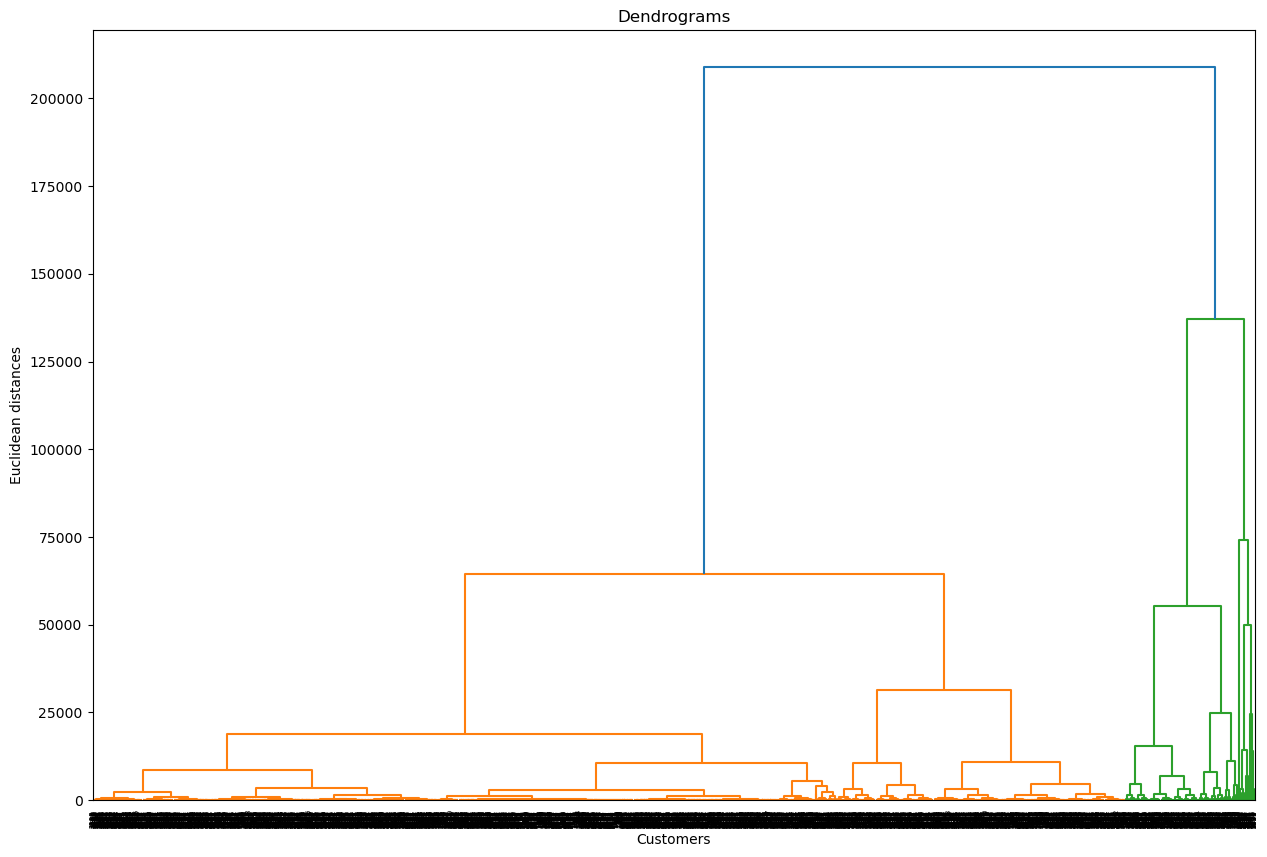

In [72]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrograms")
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [73]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage='ward')

In [74]:
y_hc = hc.fit_predict(X)
y_hc

c:\Users\krujo\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 2, 1, ..., 1, 1, 1], dtype=int64)

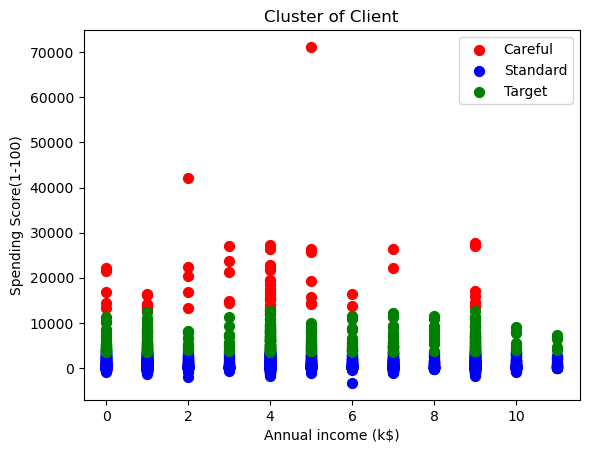

In [75]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=50, c='red', label='Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=50, c='blue', label='Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=50, c='green', label='Target')

plt.title('Cluster of Client')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

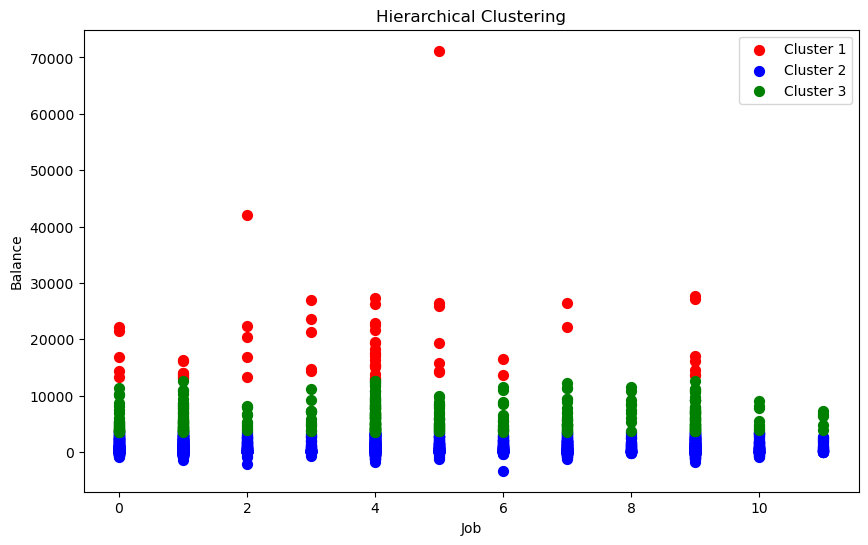

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1],
            s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1],
            s=50, c='green', label='Cluster 3')
plt.title('Hierarchical Clustering')
plt.xlabel('Job')
plt.ylabel('Balance')
plt.legend()
plt.show()